## Working with Triangles

### Getting Started
Welcome! We drafted these tutorials to help you get familiar with some of the common functionalities that most actuaries can use in their day-to-day responsibilities. The package also comes with pre-installed datasets that you can play with, which are also used in the tutorials here.

The tutorials assume that you have the basic understanding of commonly used actuarial terms, and can independently perform an actuarial analysis in another tool, such as Microsoft Excel or another actuarial software. Furthermore, it is assumed that you already have some familiarity with Python, and that you have the basic knowledge and experience in using some common packages that are popular in the Python community, such as `pandas` and `numpy`.

All tutorials and exercises rely on chainladder v0.8.4 and later. There have also been breaking changes with `pandas 1.0` and if you are using an earlier version, date slicing may behave differently and unexpectedly.

In [1]:
import pandas as pd
import numpy as np
import chainladder as cl
import os
print('pandas: ' + pd.__version__)
print('numpy: ' + np.__version__)
print('chainladder: ' + cl.__version__)

pandas: 1.2.5
numpy: 1.21.0
chainladder: 0.8.4


If you need to update your installed packages, copy and paste the following in your terminal, per this [thread](https://stackoverflow.com/questions/2720014/how-to-upgrade-all-python-packages-with-pip): 

`pip list --outdated --format=freeze | grep -v '^\-e' | cut -d = -f 1  | xargs -n1 pip install -U`

Since we will be plotting for quite a bit, here's a magic function in IPython, which sets the backend of matplotlib to the 'inline' backend. With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

In [2]:
%matplotlib inline

### Working with a Triangle
Let's begin by looking at an unprocessed triangle data, we'll use the data `raa`. Depends on where your script currently sits, you might have to modify the file path accordingly.

In [3]:
raa_df = pd.read_csv("../../../../Chainladder-Python/chainladder-python/chainladder/utils/data/raa.csv")
raa_df.head(20)

,development,origin,values
0,1981,1981,5012.0
1,1982,1982,106.0
2,1983,1983,3410.0
3,1984,1984,5655.0
4,1985,1985,1092.0
5,1986,1986,1513.0
6,1987,1987,557.0
7,1988,1988,1351.0
8,1989,1989,3133.0
9,1990,1990,2063.0


The data has three columns: 
* development: or valuation time, in this case, valuation year
* origin: or accident date, in this case, accident year
* values: the values recorded for the specific accident date at that valuation time (such as incurred losses, paid losses, or claim counts)

A table of loss experience showing total losses for a certain period (origin) at various, regular valuation dates (development), reflecting the change in amounts as claims mature. Older periods in the table will have one more entry than the next youngest period, leading to the triangle shape of the data in the table or any other measure that matures over time from a set origin date. Loss triangles can be used to determine loss development for a given risk.

Let's put it in the triangle format:

In [4]:
raa = cl.Triangle(raa_df, origin='origin', development='development', columns='values')
raa

,12,24,36,48,60,72,84,96,108,120
1981,"5,012","8,269","10,907","11,805","13,539","16,181","18,009","18,608","18,662","18,834"
1982,106,"4,285","5,396","10,666","13,782","15,599","15,496","16,169","16,704",NaN
1983,"3,410","8,992","13,873","16,141","18,735","22,214","22,863","23,466",NaN,NaN
1984,"5,655","11,555","15,766","21,266","23,425","26,083","27,067",NaN,NaN,NaN
1985,"1,092","9,565","15,836","22,169","25,955","26,180",NaN,NaN,NaN,NaN
1986,"1,513","6,445","11,702","12,935","15,852",NaN,NaN,NaN,NaN,NaN
1987,557,"4,020","10,946","12,314",NaN,NaN,NaN,NaN,NaN,NaN
1988,"1,351","6,947","13,112",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,"3,133","5,395",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990,"2,063",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


You can also load the example data directly, using `load_sample`:

In [5]:
raa = cl.load_sample('raa')
raa

,12,24,36,48,60,72,84,96,108,120
1981,"5,012","8,269","10,907","11,805","13,539","16,181","18,009","18,608","18,662","18,834"
1982,106,"4,285","5,396","10,666","13,782","15,599","15,496","16,169","16,704",NaN
1983,"3,410","8,992","13,873","16,141","18,735","22,214","22,863","23,466",NaN,NaN
1984,"5,655","11,555","15,766","21,266","23,425","26,083","27,067",NaN,NaN,NaN
1985,"1,092","9,565","15,836","22,169","25,955","26,180",NaN,NaN,NaN,NaN
1986,"1,513","6,445","11,702","12,935","15,852",NaN,NaN,NaN,NaN,NaN
1987,557,"4,020","10,946","12,314",NaN,NaN,NaN,NaN,NaN,NaN
1988,"1,351","6,947","13,112",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,"3,133","5,395",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990,"2,063",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A triangle has more properties than just what is displayed.  For example we can see the underlying `link_ratio`s.  Which represent the multiplicative change in amounts from one development period to the next.

In [6]:
raa.link_ratio

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
1981,1.6498,1.3190,1.0823,1.1469,1.1951,1.1130,1.0333,1.0029,1.0092
1982,40.4245,1.2593,1.9766,1.2921,1.1318,0.9934,1.0434,1.0331,NaN
1983,2.6370,1.5428,1.1635,1.1607,1.1857,1.0292,1.0264,NaN,NaN
1984,2.0433,1.3644,1.3489,1.1015,1.1135,1.0377,NaN,NaN,NaN
1985,8.7592,1.6556,1.3999,1.1708,1.0087,NaN,NaN,NaN,NaN
1986,4.2597,1.8157,1.1054,1.2255,NaN,NaN,NaN,NaN,NaN
1987,7.2172,2.7229,1.1250,NaN,NaN,NaN,NaN,NaN,NaN
1988,5.1421,1.8874,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,1.7220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


You can also apply heatmap over the `link_ratio`s, the heatmap is applied over columns.

In [7]:
raa.link_ratio.heatmap()

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
1981,1.6498,1.3190,1.0823,1.1469,1.1951,1.1130,1.0333,1.0029,1.0092
1982,40.4245,1.2593,1.9766,1.2921,1.1318,0.9934,1.0434,1.0331,
1983,2.6370,1.5428,1.1635,1.1607,1.1857,1.0292,1.0264,,
1984,2.0433,1.3644,1.3489,1.1015,1.1135,1.0377,,,
1985,8.7592,1.6556,1.3999,1.1708,1.0087,,,,
1986,4.2597,1.8157,1.1054,1.2255,,,,,
1987,7.2172,2.7229,1.1250,,,,,,
1988,5.1421,1.8874,,,,,,,
1989,1.7220,,,,,,,,


We can also view (and manipulate) the `latest_diagonal` of the triangle:

In [8]:
raa.latest_diagonal

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,1990
1981,"18,834"
1982,"16,704"
1983,"23,466"
1984,"27,067"
1985,"26,180"
1986,"15,852"
1987,"12,314"
1988,"13,112"
1989,"5,395"
1990,"2,063"


In [9]:
raa.latest_diagonal/1000

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,1990
1981,18.83
1982,16.70
1983,23.47
1984,27.07
1985,26.18
1986,15.85
1987,12.31
1988,13.11
1989,5.39
1990,2.06


The latest diagonal also corresponds to a `valuation_date`:

In [10]:
raa.valuation_date

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Timestamp('1990-12-31 23:59:59.999999999')

We can also tell whether our triangle:
* `is_cumulative`: returns True if the data across the development periods is cumulative, or False if it is incremental
* `is_ultimate`: returns True if the ultimate values are contained in the triangle
* `is_val_tri`: returns True if the development period is stated as a valuation data as opposed to an age, i.e. Schedule P style triangle (True) or more common triangle type by age (False)
* `is_full`: returns True if the triangle has been "squared"

In [11]:
print('Is triangle cumulative?', raa.is_cumulative)
print('Does triangle contain ultimate projections?', raa.is_ultimate)
print('Is this a valuation triangle?', raa.is_val_tri)
print('Has the triangle been "squared"?', raa.is_full)

Is triangle cumulative? True
Does triangle contain ultimate projections? False
Is this a valuation triangle? False
Has the triangle been "squared"? False


We can also inspect the triangle to understand its data granularity with `origin_grain` and `development_grain`:

In [12]:
print('Origin grain: ', raa.origin_grain)
print('Development grain: ', raa.development_grain)

Origin grain:  Y
Development grain:  Y


`chainladder` supports monthly ("M"), quarterly ("Q") and yearly ("Y") grains for both Origin and Development.

### The chainladder.Triangle structure
The triangle described so far is a two-dimensional (accident date by valuation date) structure that spans multiple cells of data. This is a useful structure for exploring individual triangles, but becomes more problematic when working with **sets** of triangles. Pandas does not have a triangle `dtype`, but if it did, working with sets of triangles would be much more convenient. To facilitate working with more than one triangle at a time the `chainladder.Triangle` acts like a pandas dataframe (with an index and columns) where each cell (row x col) is an individual triangle.  This structure manifests itself as a four-dimensional space. Let's take a look at `clrd`.

In [13]:
triangles_set_df = pd.read_csv("../../../../Chainladder-Python/chainladder-python/chainladder/utils/data/clrd.csv")
triangles_set_df

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss,CumPaidLoss,BulkLoss,EarnedPremDIR,EarnedPremCeded,EarnedPremNet,Single,PostedReserve97,LOB
0,86,Allstate Ins Co Grp,1988,1988,1,367404,70571,127737,400699,5957,394742,0,281872,wkcomp
1,86,Allstate Ins Co Grp,1988,1989,2,362988,155905,60173,400699,5957,394742,0,281872,wkcomp
2,86,Allstate Ins Co Grp,1988,1990,3,347288,220744,27763,400699,5957,394742,0,281872,wkcomp
3,86,Allstate Ins Co Grp,1988,1991,4,330648,251595,15280,400699,5957,394742,0,281872,wkcomp
4,86,Allstate Ins Co Grp,1988,1992,5,354690,274156,27689,400699,5957,394742,0,281872,wkcomp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42840,44598,College Liability Ins Co Ltd RRG,1995,1996,2,343,249,82,397,0,397,1,630,othliab
42841,44598,College Liability Ins Co Ltd RRG,1995,1997,3,839,575,190,397,0,397,1,630,othliab
42842,44598,College Liability Ins Co Ltd RRG,1996,1996,1,125,6,98,257,0,257,1,630,othliab
42843,44598,College Liability Ins Co Ltd RRG,1996,1997,2,95,17,28,257,0,257,1,630,othliab


In [14]:
triangles_set = cl.load_sample('clrd')
triangles_set

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(775, 6, 10, 10)"
Index:,"[GRNAME, LOB]"
Columns:,"[IncurLoss, CumPaidLoss, BulkLoss, EarnedPremDIR, EarnedPremCeded, EarnedPremNet]"


Since 4D strucures do not fit nicely on 2D screens, we see a summary view instead that describes the structure rather than the underlying data itself. However, this structure behaves very much like a pandas dataframe. For example, we can explore the index and columns much like we would in pandas. 

We see 5 rows of information:
* Valuation: the valuation date
* Grain: the granularity of the data, O stands for occurrence, and D stands for development, OYDY represents a triangle with accident year by development year. Other grains that are commonly used are Q for quarterly, and M for monthly
* Index: contains 4 numbers:
    * 775: the number of segments, which is the combination of `index`, that represents segments. In this case, it is each of the `GRNAME` and `LOB` combination.
    * 6: the number of triangles for each segment, which is also the columns `[IncurLoss, CumPaidLoss, BulkLoss, EarnedPremDIR, EarnedPremCeded, EarnedPremNet]`. They could be paid amounts, incurred amounts, reported counts, loss ratios, closure rates, excess losses, premium, etc.
    * 10: the number of accident period
    * 10: the number of valuation period

In [15]:
triangles_set.index.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,GRNAME,LOB
0,Adriatic Ins Co,othliab
1,Adriatic Ins Co,ppauto
2,Aegis Grp,comauto
3,Aegis Grp,othliab
4,Aegis Grp,ppauto


Using index.head() allows us to see the first 5 segments in the set of triangles.

As a 4D structure, this sample triangle represents a collection of 775x6 or 4,650 triangles that are themselves 10 accident years x 10 development lags.  This can be seen directly in the `__repr__` as well as the calling on the `shape` property of the triangle

In [16]:
triangles_set.shape

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(775, 6, 10, 10)

Under the hood, the data structure is a `numpy.ndarray` with the equivalent shape.  Like pandas, you can directly access the underlying numpy structure with the `values` property.  By exposing the underlying `ndarray` you are free to manipulate the underlying data directly with numpy should that be an easier route to solving a problem.  Keep in mind though, the `chainladder.Triangle` has several methods and properties beyond the raw numpy representation and these are kept in sync by using the `chainladder.Triangle` directly.

In [17]:
print(type(triangles_set.values))
print(triangles_set.values.shape)
print(np.nansum(triangles_set.values))

<class 'numpy.ndarray'>
(775, 6, 10, 10)
3661713596.0


### pandas-style slicing
As mentioned, the 4D structure is intended to behave like a pandas `DataFrame`.  Like pandas, we can subset a dataframe by referencing individual columns by name:

In [18]:
triangles_set[['CumPaidLoss', 'IncurLoss', 'BulkLoss']]

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(775, 3, 10, 10)"
Index:,"[GRNAME, LOB]"
Columns:,"[CumPaidLoss, IncurLoss, BulkLoss]"


We can also boolean-index the rows of the Triangle.

In [19]:
triangles_set[triangles_set['LOB']=='wkcomp']

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(132, 6, 10, 10)"
Index:,"[GRNAME, LOB]"
Columns:,"[IncurLoss, CumPaidLoss, BulkLoss, EarnedPremDIR, EarnedPremCeded, EarnedPremNet]"


We can even use the typical `loc`, `iloc` functionality similar to pandas to access subsets of data.  These features can be chained together as much as you want.

In [20]:
triangles_set.loc['Allstate Ins Co Grp'].iloc[-1]['CumPaidLoss']

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,12,24,36,48,60,72,84,96,108,120
1988,"70,571","155,905","220,744","251,595","274,156","287,676","298,499","304,873","321,808","325,322"
1989,"66,547","136,447","179,142","211,343","231,430","244,750","254,557","270,059","273,873",NaN
1990,"52,233","133,370","178,444","204,442","222,193","232,940","253,337","256,788",NaN,NaN
1991,"59,315","128,051","169,793","196,685","213,165","234,676","239,195",NaN,NaN,NaN
1992,"39,991","89,873","114,117","133,003","154,362","159,496",NaN,NaN,NaN,NaN
1993,"19,744","47,229","61,909","85,099","87,215",NaN,NaN,NaN,NaN,NaN
1994,"20,379","46,773","88,636","91,077",NaN,NaN,NaN,NaN,NaN,NaN
1995,"18,756","84,712","87,311",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,"42,609","44,916",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### pandas-style arithmetic
With complete flexibility in the ability to slice subsets of triangles, we can use basic arithmetic to form new triangles.  A common approach is to perform column arithmetic to derive new columns.

In [21]:
triangles_set['CaseIncurLoss'] = triangles_set['IncurLoss'] - triangles_set['BulkLoss']
triangles_set['PaidToInc'] = triangles_set['CumPaidLoss'] / triangles_set['CaseIncurLoss']
triangles_set[['CaseIncurLoss', 'PaidToInc']]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(775, 2, 10, 10)"
Index:,"[GRNAME, LOB]"
Columns:,"[CaseIncurLoss, PaidToInc]"


Another common manipulation is aggregating the values across all rows of a dataframe/triangle

In [22]:
triangles_set['CumPaidLoss'].sum()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,12,24,36,48,60,72,84,96,108,120
1988,"3,577,780","7,059,966","8,826,151","9,862,687","10,474,698","10,814,576","10,994,014","11,091,363","11,171,590","11,203,949"
1989,"4,090,680","7,964,702","9,937,520","11,098,588","11,766,488","12,118,790","12,311,629","12,434,826","12,492,899",NaN
1990,"4,578,442","8,808,486","10,985,347","12,229,001","12,878,545","13,238,667","13,452,993","13,559,557",NaN,NaN
1991,"4,648,756","8,961,755","11,154,244","12,409,592","13,092,037","13,447,481","13,642,414",NaN,NaN,NaN
1992,"5,139,142","9,757,699","12,027,983","13,289,485","13,992,821","14,347,271",NaN,NaN,NaN,NaN
1993,"5,653,379","10,599,423","12,953,812","14,292,516","15,005,138",NaN,NaN,NaN,NaN,NaN
1994,"6,246,447","11,394,960","13,845,764","15,249,326",NaN,NaN,NaN,NaN,NaN,NaN
1995,"6,473,843","11,612,151","14,010,098",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,"6,591,599","11,473,912",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,"6,451,896",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Aggregating rows is nice, but it is often useful to aggregate across groups of rows using `groupby`.  For example, we may want to group the triangles by Line of Business and get a sum across all companies for each industry.

In [23]:
triangles_set.groupby('LOB').sum()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(6, 8, 10, 10)"
Index:,[LOB]
Columns:,"[IncurLoss, CumPaidLoss, BulkLoss, EarnedPremDIR, EarnedPremCeded, EarnedPremNet, CaseIncurLoss, PaidToInc]"


The aggregate functions, e.g. `sum`, `mean`, `std`, `min`, `max`, etc. don't have to just apply to the `index` axis.  You can apply them to any of the four axes in the triangle object. using either the axis name or number.

In [24]:
triangles_set.sum(axis=1).sum(axis='index')

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,12,24,36,48,60,72,84,96,108,120
1988,"56,387,734","59,928,520","61,653,458","62,644,631","63,182,710","63,438,080","63,440,904","63,452,111","63,522,981","63,518,183"
1989,"62,840,448","66,705,570","68,666,928","69,702,283","70,188,013","70,355,679","70,389,857","70,453,158","70,483,269",NaN
1990,"70,064,967","74,084,388","75,879,276","76,812,990","77,179,572","77,240,321","77,283,937","77,345,588",NaN,NaN
1991,"74,611,611","78,513,121","80,235,908","80,967,061","81,178,876","81,185,484","81,278,636",NaN,NaN,NaN
1992,"81,213,791","85,089,370","86,443,882","86,783,107","86,908,610","87,086,637",NaN,NaN,NaN,NaN
1993,"87,896,227","91,685,456","93,018,485","93,167,810","93,473,079",NaN,NaN,NaN,NaN,NaN
1994,"94,593,702","98,130,718","99,071,781","99,809,122",NaN,NaN,NaN,NaN,NaN,NaN
1995,"97,722,814","101,192,332","102,056,680",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,"98,497,932","100,917,690",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,"96,832,221",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Accessor methods
Pandas has special 'accessor' methods for `str` and `dt`.  These allow for the manipulation of data within each cell of data:

```python
df['Last_First'].str.split(',') # splits lastname from first name by a comma-delimiter
df['Accident Date'].dt.year # pulls the year out of each date in a dataframe column
```

`chainladder` also has special 'accessor' methods designed to allow you to manipulate the `origin`, `development` and `valuation`
vectors of a triangle.

We may want to extract only the latest accident period for every triangle.

In [25]:
triangles_set[triangles_set.origin==triangles_set.origin.max()]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(775, 8, 1, 10)"
Index:,"[GRNAME, LOB]"
Columns:,"[IncurLoss, CumPaidLoss, BulkLoss, EarnedPremDIR, EarnedPremCeded, EarnedPremNet, CaseIncurLoss, PaidToInc]"


We may want to extract particular diagonals from our triangles using its `valuation` vector

In [26]:
triangles_set[(triangles_set.valuation>='1994')&(triangles_set.valuation<='1995')].sum()['CumPaidLoss']

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,12,24,36,48,60,72,84
1988,NaN,NaN,NaN,NaN,NaN,NaN,"10,994,014"
1989,NaN,NaN,NaN,NaN,NaN,"12,118,790",NaN
1990,NaN,NaN,NaN,NaN,"12,878,545",NaN,NaN
1991,NaN,NaN,NaN,"12,409,592",NaN,NaN,NaN
1992,NaN,NaN,"12,027,983",NaN,NaN,NaN,NaN
1993,NaN,"10,599,423",NaN,NaN,NaN,NaN,NaN
1994,"6,246,447",NaN,NaN,NaN,NaN,NaN,NaN


We may even want to slice particular development periods to explore aspects of our data by development age.

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


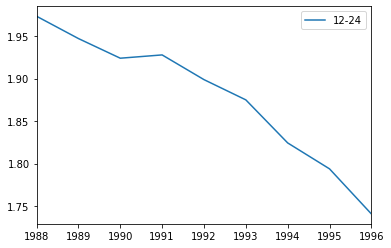

In [27]:
triangles_set[triangles_set.development<=24].sum()['CumPaidLoss'].link_ratio.plot();

### Moving back to pandas
When the shape of a `Triangle` object can be expressed as a 2D structure (i.e. two of its four axes have a length of 1), you can use the `to_frame` method to convert your data into a `pandas.DataFrame`.  The `plot` method above is nothing more than a conversion to pandas and using pandas plot.

In [28]:
triangles_set.groupby('LOB').sum().latest_diagonal['CumPaidLoss'].to_frame().astype(int)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


origin,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997
LOB,,,,,,,,,,
comauto,626097,674441,718396,711762,731033,762039,768095,675166,510191,272342
medmal,217239,222707,235717,275923,267007,276235,252449,209222,107474,20361
othliab,317889,350684,361103,426085,389250,434995,402244,294332,191258,54130
ppauto,8690036,9823747,10728411,10713621,11555121,12249826,12600432,11807279,9900842,5754249
prodliab,110973,112614,121255,100276,76059,94462,111264,62018,28107,10682
wkcomp,1241715,1308706,1394675,1414747,1328801,1187581,1114842,962081,736040,340132


### Exercises

In [29]:
# Create a 'NetPaidLossRatio' column in triangle from the existing columns
triangles_set['NetPaidLossRatio'] = triangles_set['CumPaidLoss']/triangles_set['EarnedPremNet']

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
# What is the highest net paid loss ratio for any observation for origin 1997 Age 12
triangles_set[triangles_set.origin=='1997'][triangles_set.development==12]['NetPaidLossRatio'].max()

4.769123134328358

In [31]:
# Subset the overall triangle to just include 'Alaska Nat Ins Co'
triangles_set[triangles_set['GRNAME']=='Alaska Nat Ins Co']


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(4, 9, 10, 10)"
Index:,"[GRNAME, LOB]"
Columns:,"[IncurLoss, CumPaidLoss, BulkLoss, EarnedPremDIR, EarnedPremCeded, EarnedPremNet, CaseIncurLoss, PaidToInc, NetPaidLossRatio]"


In [32]:
# Use boolean indexing to create a triangle subset that includes all triangles for companies with names starting with 'B'
triangles_set[triangles_set['GRNAME'].str[0]=='B']

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(31, 9, 10, 10)"
Index:,"[GRNAME, LOB]"
Columns:,"[IncurLoss, CumPaidLoss, BulkLoss, EarnedPremDIR, EarnedPremCeded, EarnedPremNet, CaseIncurLoss, PaidToInc, NetPaidLossRatio]"


In [33]:
# Which companies are in the top 5 net premium share for 1990?
triangles_set[triangles_set.origin=='1990']['EarnedPremNet'].latest_diagonal.groupby('GRNAME').sum().to_frame().sort_values().iloc[-5:]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


IndexError: index 8 is out of bounds for axis 3 with size 8

### Initializing a triangle with your own data
The `chainladder.Triangle`  class is designed to ingest `pandas.DataFrame` objects.  However, you do not need to worry about shaping the dataframe into triangle format yourself.  This happens at the time you ingest the data.

Let's look at the initialization signature.

In [ ]:
cl.Triangle?

We will be using the reserve prism test data to construct our triangles.

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/casact/chainladder-python/master/chainladder/utils/data/prism.csv')
data.head()

We must specify the origin, development and columns to create a triangle object.  By limiting our columns to one measure and not specifying an index, we can create a single triangle.

In [ ]:
x = cl.Triangle(
    data=data.fillna(0), origin='AccidentDate', development='PaymentDate', columns='Paid')
x

If we want to include more columns or indices we can certainly do so.  Note that as we do so, we move into the 4D arena changing the display of the overall object.

In [ ]:
x = cl.Triangle(data=data,
            origin='AccidentDate', development='PaymentDate',
            columns=['Paid', 'Incurred'])
x

Though nothing stops us from using the slicing options above to represent 2D triangles

In [ ]:
x['Paid']

pandas has wonderful datetime inference functionality that the `Triangle` heavily uses to infer origin and development granularity.  Even still, there are rare occassions where date format inferences can fail and it is better to explicitly tell the triangle the date format.

In [ ]:
cl.Triangle(data=data,
            origin='AccidentDate', development='PaymentDate',
            columns=['Paid', 'Incurred'],
            origin_format='%Y-%m-%d', development_format='%Y-%m-%d') # Explicit > Implicit
x.incr_to_cum()

Up until now, we've been playing with symmetric triangles, i.e. the origin period and the development period are the same grain.  However, nothing precludes us from having a different grain.  Often times in practice the `development` axis is more granular than the `origin` axis.  All the functionality available to symmetric triangles works equally well for asymmetric triangles.

In [ ]:
data['AccYr'] = data['AccidentDate'].str[:4]

x = cl.Triangle(data=data,
            origin='AccYr', development='PaymentDate',
            columns=['Paid', 'Incurred'],
            origin_format='%Y', development_format='%Y-%m-%d')
x

While exposure triangles make sense for auditable lines like workers compensation, there are many lines of business where exposure expressed as a 1D vector sufficiently and completely describes the data structure.  `chainladder` arithmetic requires that operations happen between a triangle and either an `int`, `float`, or another `Triangle`.  To create a 1D exposure vector, simply omit the `development` argument at initialization.

In [ ]:
data['Premium'] = data['Incurred'] * 3 # Contrived

x = cl.Triangle(data=data,
            origin='AccidentDate',
            columns='Premium',
            origin_format='%Y-%m-%d')
print(type(x))
x

We have not created triangles with an index yet, but this is easily done by passing the index argument.

In [ ]:
x = cl.Triangle(
    data=data,
    origin='AccidentDate',
    development='PaymentDate',
    columns=['Paid', 'Incurred'],
    index='Line', # Add index
    origin_format='%Y-%m-%d', development_format='%Y-%m-%d')
x

Just as we are not limited to one single column, we are not limited to a single index either.  Multiple indices can be passed as a list.

In [ ]:
x = cl.Triangle(
    data=data,
    origin='AccidentDate',
    development='PaymentDate',
    columns=['Paid', 'Incurred'],
    index=['Line','Type']) # multiple indices

x

### Triangle methods not available in pandas
Up until now, we've kept pretty close to the pandas API for triangle manipulation.  However, there are data transformations commonly applied to triangles that don't have a nice pandas analogy.

For example, the practitioner often wants to convert a triangle from an incremental view into a cumulative view and vice versa.  This is accomplished with the `incr_to_cum` and `cum_to_incr` methods.

Since our data is stored incrementally, we want to accumulate the data after we've ingested into a `Triangle`

In [ ]:
x = cl.Triangle(data=data,
            origin='AccidentDate', development='PaymentDate',
            columns='Paid')
x.incr_to_cum()

By default (and in concert with the pandas philosophy), the methods associated with the `Triangle` class strive for immutability.  This means that the triangle we just accumulated was thrown away and our original object is incremental.  Many of the `chainladder.Triangle` methods have an `inplace` argument or alternatively you can just use variable reassignment to store the transformation.

In [ ]:
# This works
x.incr_to_cum(inplace=True)
# So does this
x = x.incr_to_cum()

When dealing with triangles that have an `origin` axis, `development` axis or both at a monthly or quarterly grain, the triangle can be summarized to a higher grain using the `grain` method.

The grain to which you want your triangle converted, specified as 'O*x*D*y*' where *x* and *y* can take on values of ``['Y', 'Q', 'M']``
For example:
* 'OYDY' yields Origin Year/Development Year<br>
* 'OQDM' yields Origin quarter/Development Month<br>

In [ ]:
x = x.grain('OYDY')
x

Depending on the type of analysis being done, it may be more convenient to look at a triangle with its `development` axis expressed as a valuation rather than an age. To do this, the `Triangle` has two methods for toggling between a development triangle and a valuation triangle.  The methods are `dev_to_val` and its inverse `val_to_dev`

In [ ]:
x.dev_to_val()

When working with real-world data, the triangles can have holes.  A common issue is that subsets of a triangle might be new programs or lines and others more mature.  In these cases, it doesn't make sense to include empty accident periods or development ages for the new/retired line.  For example the 'Home' line has its latest accidents through '2016-03' whereas the 'Auto' program exhibits losses through '2017-12'.  Sometimes, dropping the non-applicable fields is usefule with the `dropna()` method.

In [ ]:
x = cl.Triangle(
    data=data,
    origin='AccidentDate',
    development='PaymentDate',
    columns=['Paid'],
    index=['Line']).incr_to_cum().grain('OYDY')
x.loc['Home']

Note that the `dropna()` method will retain empty periods if they are surrounded by non-empty periods with valid data.

In [ ]:
x.loc['Home'].dropna()

### Commutative properties of Triangle methods
Where it makes sense, (which is in most cases), the methods described above are commutative and can be applied in any order.

In [ ]:
print('Commutative? ', x.sum().latest_diagonal == x.latest_diagonal.sum())
print('Commutative? ', x.loc['Auto'].link_ratio == x.link_ratio.loc['Auto'])
print('Commutative? ', x.grain('OYDY').sum() == x.sum().grain('OYDY'))

### Triangle import/export

To the extent the `Triangle` can be expressed as a `pandas.DataFrame`, you can use any of the pandas IO to send the data out.  Note that converting to pandas is a one-way ticket with no inverse functions.

In [ ]:
x.sum().to_clipboard() # Automatically converts to a pandas dataframe and puts in the clipboard for pasting in Excel

Alternatively, if you want to store the triangle elsewhere but be able to reconstitute a triangle out of it later, then you can use:
* `Triangle.to_json` and its inverse `cl.read_json` for json format<br>
* `Triangle.to_pickle` and its inverse `cl.read_pickle` for pickle format<br>

These have the added benefit of working on multi-dimensional triangles that don't fit into a DataFrame.

In [ ]:
y = x.to_json() # store as JSON string
x == cl.read_json(y) # reconstitute and compare to original object

In [ ]:
x.to_pickle('triangle.pkl') # store on pickle bytecode
x == cl.read_pickle('triangle.pkl') # reconstitute and compare to original object

### Exercises

In [ ]:
x = cl.Triangle(
    data=data,
    origin='AccidentDate',
    development='PaymentDate',
    columns=['Paid', 'Incurred'],
    index=['Line', 'Type']).incr_to_cum() # multiple indices
x

In [ ]:
# What is the case incurred activity for calendar period 2015Q2 by Line?
y = x.groupby('Line').sum().cum_to_incr()['Incurred'].dev_to_val()
y[(y.valuation>'2015-07-01')&(y.valuation<'2015-10-01')].sum('origin').to_frame().astype(int)

In [ ]:
# What proportion of our Paid come from each 'Type' for Accident year 2015?
count_by_type = x[x.origin=='2015'].latest_diagonal['Paid'].groupby('Type').sum().to_frame()
(count_by_type/count_by_type.sum())